<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL SEXTA REVISIÓN</b> <a class="tocSkip"></a>

Felicidades, Clara, tu proyecto queda aprobado! muchas gracias por tu esfuerzo! Saludos cordiales!

</div>

# PROYECTO INTEGRADO 


Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

***Descripcion del Dataset***

 —Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género)

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)

— EU_sales (ventas en Europa en millones de dólares estadounidenses)

— JP_sales (ventas en Japón en millones de dólares estadounidenses)

— Other_sales (ventas en otros países en millones de dólares estadounidenses)

— Critic_Score (máximo de 100)

— User_Score (máximo de 10)

— Clasificación (ESRB)

### Cargar las librerias y funciones 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
import re
from functools import reduce
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
## Cargar los datos
try: #anaconda
    games = pd.read_csv('games.csv')

except: #jupyter
    games = pd.read_csv('/datasets/games.csv') 


In [3]:
#games = calls

### Preparar los datos

In [4]:
# Creamos una funcion para visualizar los datos

def data_info(df):
    print('---------------------------------------')
    print('Filas y columnas: \n{}'.format(df.shape))
    print()
    print('Informacion general:')
    print(df.info())
    print()
    print('Primeras cinco columnas: \n{}'.format(df.head()))
    print()
    print('Detalles estadisticos: \n{}'.format(df.describe()))
    print()
    print('Cuantos duplicados hay?\n')
    print('Hay {} datos duplicados.'.format(df.duplicated().sum()))
    print()
    print('Valores ausentes ?')
    print(df.isna().sum(),'\n')
    print('Porcentaje de valores ausentes \n')
    print(df.isna().mean().reset_index().round(2))
    print('---------------------------------------')

In [5]:
# funcion para convertir a formato fecha

def convert_to_datetime(df, column_name):
    """
    Esta función convierte una columna de un DataFrame a tipo datetime 
    Returns:
    pandas.DataFrame: El DataFrame con la columna convertida a tipo datetime.
    """
    df[column_name] = pd.to_datetime(df[column_name])
    return df

In [6]:
#Funcion que separa la fecha por dia mes y año

def get_date(df): 
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year

In [7]:
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # create grouped data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

In [8]:
def plot_distribution(df, x, y, column ='', value='', func=np.sum):
    if column != '' and value != '':
        filter_df = df[df[column] == value]
        plot_df = filter_df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    else:
        plot_df = df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    xlabel = x.replace('_', ' ').capitalize()
    ylabel = str(y.replace('_', ' ').capitalize())
    title = str(value) + " - " + ylabel + " vs. " + xlabel
    ax = plot_df.plot(kind='bar', figsize=(12,6), rot=45, title=title, edgecolor='silver', legend=False)
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontdict={'size':12}, fontweight='bold')
    # place annotate on top of bars
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', color='dodgerblue', horizontalalignment='left', size=10)
        

## Etapa 1. Descripción de los datos

los datos de games contienen las siguentes columnas
- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100): puntuacion de los critos
- User_Score (máximo de 10) : puntuacion de los usuarios
- Clasificación (ESRB)

In [9]:
#Imprime la información general/resumen sobre el DataFrame de los planes
data_info(games)

---------------------------------------
Filas y columnas: 
(16715, 11)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Primeras cinco columnas: 
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wi

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente función para obtener info de tus datos!    
</div>

In [10]:
# Descripcion estadistica de los datos

games.describe().round(2)

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count         16446.00  16715.00  16715.00  16715.00     16715.00   
mean           2006.48      0.26      0.15      0.08         0.05   
std               5.88      0.81      0.50      0.31         0.19   
min            1980.00      0.00      0.00      0.00         0.00   
25%            2003.00      0.00      0.00      0.00         0.00   
50%            2007.00      0.08      0.02      0.00         0.01   
75%            2010.00      0.24      0.11      0.04         0.03   
max            2016.00     41.36     28.96     10.22        10.57   

       Critic_Score  
count       8137.00  
mean          68.97  
std           13.94  
min           13.00  
25%           60.00  
50%           71.00  
75%           79.00  
max           98.00

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Genial revisar las estadísticas descriptivas    
</div>

   -  Más del 25% de los juegos no tienen ventas en ninguna área. Además, los mejores 75 percentiles ni siquiera alcanzan la marca de los 0.24 millones de dólares.
   -  Los primeros 25 percentiles de los datos tienen juegos que van desde principios de los años ochenta hasta principios del nuevo milenio (1980 a 2003), presentando un rango de cuartil mucho más amplio que los otros cuartiles, lo que significa que hay muchos menos juegos del periodo antes de 2003 y puede haber menos juegos para explorar de estos años.1
   - Solo los primeros 25 percentiles de los juegos en los datos recibieron menos de 60 puntos de 'Critic_Score'; deberíamos explorarlos para entender qué disminuye la puntuación de los críticos de un juego.

In [11]:
# mostrar los primros 5 elementos

games.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [12]:
(games.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

0       1           2                3     4      5   \
Variables  Critic_Score  Rating  User_Score  Year_of_Release  Name  Genre   
Missing            8578    6766        6701              269     2      2   

                 6         7         8         9            10  
Variables  Platform  NA_sales  EU_sales  JP_sales  Other_sales  
Missing           0         0         0         0            0

In [13]:
# mostrar el numero de columnas

games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [14]:
print(games.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


 Conclucion general
 
- las columnas cualitativas faltantes en  'Critic_Score', 'User_Score', 'Rating'  deberán ser llenados.

- Los nombres de todas las columnas deben ser escritos en minúsculas, al igual que los valores en las columnas 'Name', 'Platform' y 'Genre'. Esto se debe hacer para evitar valores duplicados, pronunciaciones incorrectas de las columnas y valores, entre otros.

- La columna 'Year_of_Release' puede ser convertida a tipo de datos int64.
- Las columnas 'Platform', 'Genre' y 'Rating' podrían ser convertidas a tipo de datos categórico  "dtype"
    El valor 'tbd' en la fila 16706 (es decir, la segunda fila en el DF 'last-rows-of-the-data') sugiere que los datos en esa columna no son de tipo numérico, y se necesitará verificar si todos los valores faltantes y 'tbd' tienen alguna conexión.
- Hay algunas filas con ventas absolutamente cero, y es probable que la mayoría de ellas no tengan una calificación. Como sabemos que la mayoría de los datos están incompletos, podemos asumir que estas filas representan juegos recién lanzados o próximos a lanzarse. Esto se explorará más adelante.

## Paso 2. PREPROCESAMIENTO DE DATOS

En esta parte arreglaremos y corregiremos los errores detectados en el punto anterior 

In [15]:
# Convertimos todas las columnas a minúsculas utilizando applymap y str.lower()

games = games.applymap(lambda s: s.lower() if type(s) == str else s)

# Modificamos el nombre de la columna a minuscula

games.columns = games.columns.str.lower()

games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      e  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      e  
3     10.93      3.28         2.95          80.0          8      e  
4      8.89     10.22         1.00           NaN        NaN    NaN

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Muy bien pero no es necesario cambiar a minúsculas todo el dataframe, sólo los nombres de las columnas</div>

### Valores ausentes

hay que detectar y reemplazar los valores ausentes de acuerdo a cada criterio, pudiendo ser cualittivo o cuantitativo

In [16]:
(games.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

0       1           2                3     4      5   \
Variables  critic_score  rating  user_score  year_of_release  name  genre   
Missing            8578    6766        6701              269     2      2   

                 6         7         8         9            10  
Variables  platform  na_sales  eu_sales  jp_sales  other_sales  
Missing           0         0         0         0            0

 #### 0.1 Valores ausentes de las columnas `year_of_release` 	`name` y	`genre` 	

Como los datos ausentes no representan un valor significativo, seran elimiandos.

In [17]:
#Eliminar los valores ausentes de Year
games.dropna(subset=['year_of_release'], inplace=True)

#Eliminar los valores ausentes de Name
games.dropna(subset=['name'], inplace=True)

#Eliminar los valores ausentes de Genre
games.dropna(subset=['genre'], inplace=True)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien!    
</div>

In [18]:
(games.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

0       1           2     3         4                5   \
Variables  critic_score  rating  user_score  name  platform  year_of_release   
Missing            8461    6676        6605     0         0                0   

              6         7         8         9            10  
Variables  genre  na_sales  eu_sales  jp_sales  other_sales  
Missing        0         0         0         0            0

 #### 0.2 Valores ausentes de las columnas `critic_score` 	`user_score`

Revisaremos las columnas

In [19]:
games['critic_score'].sort_values(ascending=False).unique()


array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 21., 20.,
       19., 17., 13., nan])

In [20]:
games['critic_score'].isnull().sum()

8461

In [21]:
#Compruebe el porcentaje de cada valor en las columnas de Critical_score
games[ 'critic_score' ].value_counts ( ) / len ( games)  *  100

70.0    1.532474
71.0    1.508149
75.0    1.459499
80.0    1.429093
73.0    1.423011
          ...   
20.0    0.018244
29.0    0.018244
21.0    0.006081
17.0    0.006081
13.0    0.006081
Name: critic_score, Length: 81, dtype: float64

In [22]:
games['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

In [23]:
games[ 'user_score' ].value_counts ( ) / len ( games)  *  100

tbd    14.449039
7.8     1.958161
8       1.733155
8.2     1.678424
8.3     1.532474
         ...    
1.1     0.012162
1.9     0.012162
9.6     0.012162
0       0.006081
9.7     0.006081
Name: user_score, Length: 96, dtype: float64

Si bien en critic_score la columna no tiene un valor de cadena, hay demasiados "tbd" (14%) para user_scoreeliminar, primero debería cambiarlos a NaN

In [24]:
games['user_score']=games['user_score'].replace( ['tbd'],np.nan)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta acción    
</div>

Solo hay dos condiciones que podemos usar para reemplazar NaN en critic_scoreyuser_score
- Primero es usando name para calcular la media en cada juego.
- si todavía quedan NaN, podríamos usar genre para calcular la media en su lugar.

In [25]:
#Cambiar 'user_score' a entero primero 
games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
games.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto cambio de tipo    
</div>

In [26]:
#rellenar  'user_score' y  'critic_score'
games['user_score'] = games['user_score'].fillna(-9.9)
games['critic_score'] = games['critic_score'].fillna(-99)

#detectar cuantos valores nulos quedan

print('Valores ausentes en user_score:', games.user_score.isna().sum())
print('Valores ausentes en critic_score:', games.critic_score.isna().sum())

Valores ausentes en user_score: 0
Valores ausentes en critic_score: 0


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

~~Lo siento, Clara, los ausentes en **user_score y critic_score** son demasiados, alrededor del 50%, por tanto rellenarías tus datos con alrededor del otro 50% de datos no-ausentes, y dicha fracción es "pequeña" relativamente para considerarse representativa. Además, los ausentes en estos casos simplemente podrían deberse a que el juego no tiene calificación, ya sea por ser muy antiguo y que en esos años no se puntuaban los juegos, ya sea porque aún está por determinar la calificación. Es decir, **son ausentes que tienen una razón de ser**. Por todas estas razones, tienes dos opciones:~~
    
* ~~Dejar los ausentes como están, sin rellenar.~~
    
* ~~Rellenar los ausentes con un valor absurdo pero del mismo tipo que los datos de esa columna. Así te evitas las desventajas de tener ausentes en una columna. Por ejemplo, en critic_score hay números enteros del 0 al 100, así que podrías rellenar los ausentes con **-99** o algún otro número negativo grande, ya que es un número entero pero absurdo por ser negativo y que te hace saber que ese dato es ausente. Para user_score, cuyos datos van del 0.0 al 10.0, podrías rellenar todos los ausentes con **-9.9** por la misma razón :)~~
    
~~**ATENTA PORQUE ESTE CAMBIO ALTERARÁ VARIOS DE TUS RESULTADOS POSTERIORES EN EL PROYECTO.**~~

In [27]:
# comprobamos los datos 
(games.isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : 'Variables', 0: 'Missing'})
).T

0     1         2                3      4         5         6   \
Variables  rating  name  platform  year_of_release  genre  na_sales  eu_sales   
Missing      6676     0         0                0      0         0         0   

                 7            8             9           10  
Variables  jp_sales  other_sales  critic_score  user_score  
Missing           0            0             0           0

 #### 0.2 Valores ausentes de las columnas `Rating`

In [28]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [29]:
games.rating.value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating, dtype: int64

Por el momento no las modificaremos y las dejaremos así

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Es correcto. Aquí también podrías rellenar todos los ausentes con rp, por ejemplo, ya que ese valor significa "rating pending".

 #### 0.3 Agregaremos una columna con la suma todal de las ventas

In [30]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        sports     41.36   
1         super mario bros.      nes           1985.0      platform     29.08   
2            mario kart wii      wii           2008.0        racing     15.68   
3         wii sports resort      wii           2009.0        sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      e   
1      3.58      6.81         0.77         -99.0        -9.9    NaN   
2     12.76      3.79         3.29          82.0         8.3      e   
3     10.93      3.28         2.95          80.0         8.0      e   
4      8.89     10.22         1.00         -99.0        -9.9    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [32]:
# modificar el tipo de datos de la columna year og release 

games['year_of_release'] = games['year_of_release'].astype('int')


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen cambio de tipo    
</div>

In [33]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      e   
1      3.58      6.81         0.77         -99.0        -9.9    NaN   
2     12.76      3.79         3.29          82.0         8.3      e   
3     10.93      3.28         2.95          80.0         8.0      e   
4      8.89     10.22         1.00         -99.0        -9.9    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

***conclusiones generales***

La primera acción fue cambiar los nombres de las columnas a caracteres en minúscula para facilitar la manipulación de los datos. A continuación, se corrigieron los tipos de datos de year_of_release y user_score para asegurarse de que se trataban de los tipos de datos correctos para su posterior análisis.

A continuación, se eliminaron los valores NaN de year_of_release y name para que los datos estuvieran completos y listos para su análisis. Luego, se llenaron los valores faltantes de user_rating y critic_score utilizando el promedio de la información disponible en las columnas de name y género.

Finalmente, se agregó la columna total_sales, que se calculó a partir de las ventas de cada región. Esto puede ser útil para analizar el rendimiento general de los juegos en diferentes regiones.

En resumen, la tarea descrita es una parte importante del análisis de datos, ya que la calidad y la integridad de los datos son esenciales para obtener resultados precisos y significativos. El proceso de limpieza de datos implica identificar y corregir problemas en los datos, como valores faltantes, tipos de datos incorrectos o inconsistencias, para asegurarse de que los datos sean precisos y completos antes de su análisis.

## Paso 3 . Analisis de datos

**3.1 cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?**#


Empezaremos agrupandos los datos y creando una nueva tabla con la informacion que necesitamos

In [34]:
#agrupar los datos en  year_of_release
game_year = games.pivot_table(index = 'year_of_release', values= 'name', aggfunc='count' ).reset_index()
game_year.columns=['year', 'games_count']
game_year=game_year.sort_values('games_count', ascending=False)
game_year.head()

year  games_count
28  2008         1427
29  2009         1426
30  2010         1255
27  2007         1197
31  2011         1136

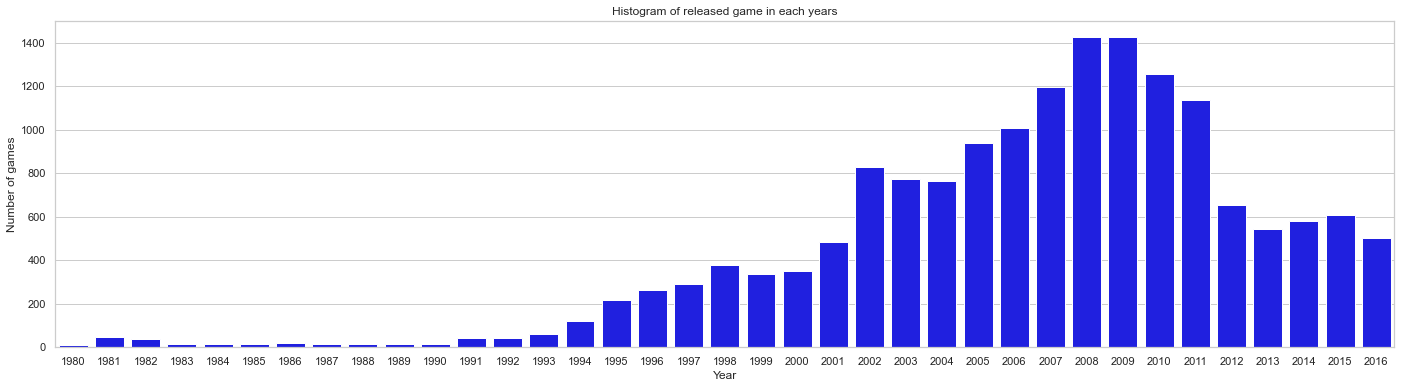

In [35]:

# Definir el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un nuevo gráfico
plt.figure(figsize=(24, 6))

# Graficar un histograma utilizando la librería Seaborn
sns.barplot(data=game_year, x='year', y='games_count', color='blue')

# Configurar las etiquetas del eje x y y
plt.xlabel('Year')
plt.ylabel('Number of games')

# Agregar un título al gráfico
plt.title('Histogram of released game in each years')

# Mostrar el gráfico
plt.show()

las ventas de juegos en todo el mundo comenzaron a crecer a finales de los años 90 y alcanzaron su pico en 2008 y 2009. Después de ese período, las ventas comenzaron a disminuir.

Esta conclusión puede ser significativa para la industria de los videojuegos, ya que puede ser útil para identificar tendencias a largo plazo y anticipar cambios en la demanda de los consumidores.

***01.¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?***

In [36]:
games_top = games.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').reset_index().sort_values("total_sales", ascending=False)
games_top = games_top.nlargest(10, 'total_sales')
games_top.head(10)

platform  total_sales
16      ps2      1233.56
28     x360       961.24
17      ps3       931.34
25      wii       891.18
4        ds       802.78
15       ps       727.58
18      ps4       314.14
6       gba       312.88
19      psp       289.53
2       3ds       257.81

In [37]:
#Agrupar los datos segun la plataforma y año y calcular el total de ventas 
list_1 = games_top['platform'].tolist()
only_top = games.query('platform in @list_1')
platform = only_top.pivot_table(index = ['platform','year_of_release' ], values = 'total_sales', aggfunc = 'sum').reset_index()
platform.head()

platform  year_of_release  total_sales
0      3ds             2011        63.20
1      3ds             2012        51.36
2      3ds             2013        56.57
3      3ds             2014        43.76
4      3ds             2015        27.78

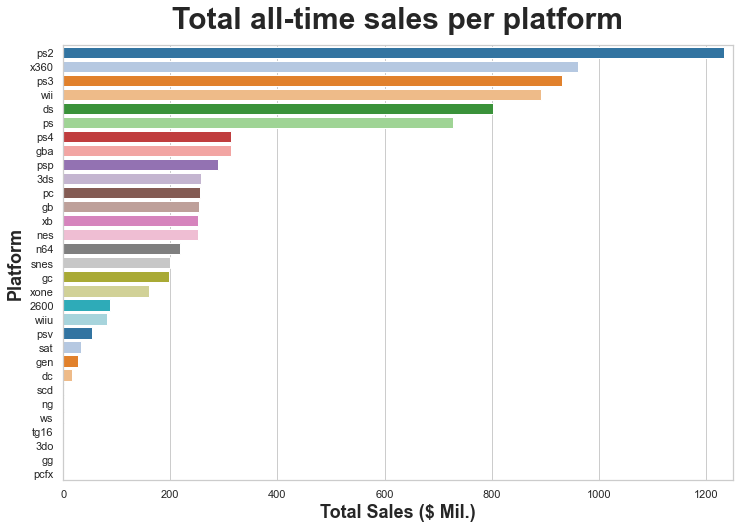

In [38]:
#Definir el estilo de los gráficos
sns.set(style="whitegrid")

#Crear un nuevo gráfico
plt.figure(figsize=(12, 8))

#Crear un pivot table para obtener las ventas totales por plataforma
sales_per_plat = games.pivot_table(values='total_sales', index='platform', aggfunc='sum')

#Ordenar las plataformas de mayor a menor venta
order_to_plot = sales_per_plat.sort_values('total_sales', ascending=False).index

#Graficar un barplot utilizando la librería Seaborn
ax = sns.barplot(data=sales_per_plat, y=sales_per_plat.index, x='total_sales', palette='tab20', order=order_to_plot)


#Configurar las etiquetas del eje x y y
plt.xlabel('Total Sales ($ Mil.)', fontdict = {'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Platform', fontdict = {'fontsize':18, 'fontweight':'bold'})

#Agregar un título al gráfico
plt.title('Total all-time sales per platform', fontdict = {'fontsize':30, 'fontweight':'bold'}, y=1.025)

#Configurar el tamaño de la fuente y el estilo del gráfico
sns.set(font_scale=1.3, style='whitegrid', rc = {'figure.figsize':(17.5,10.5)})

#Configurar el rango del eje x
plt.xlim(0,1250)

#Mostrar el gráfico
plt.show()

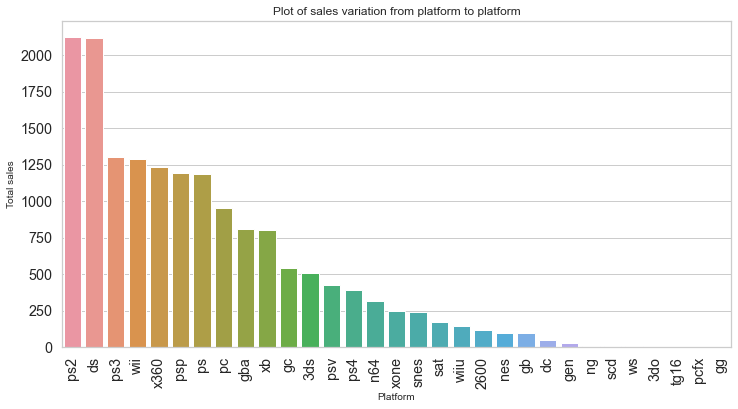

In [39]:
plot_snsbar(games, 'platform', 'total_sales', 'Plot of sales variation from platform to platform')

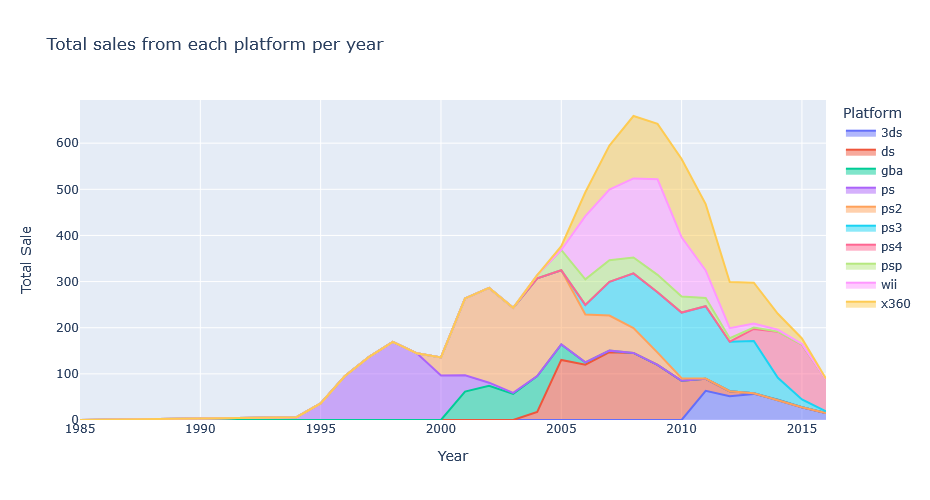

In [40]:
fig = px.area(platform, x="year_of_release", y="total_sales", color="platform",
               title='Total sales from each platform per year',
               labels=dict(year_of_release='Year', platform="Platform",total_sales="Total Sale" ),
               line_group="platform",
               height=500)
fig.show()

 las plataformas de videojuegos PS, PS2, GBA y DS que solían ser populares ya no tienen ventas, mientras que otras como X360, Wii, PS3 y PS4 todavía están en el mercado.

las plataformas les lleva unos 5 a 10 años en tomar popularidad y luego empiezan a desminuir 

**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables**

con el objetivo de identificar posibles grandes ganadores y planificar campañas publicitarias para el año 2017, es mejor utilizar solo los datos relevantes que aún tienen influencia en las predicciones para el año 2017. Por lo tanto, se decide filtrar solo un rango de años, comenzando desde el año 2012.

In [41]:
#Filtrar años desspues del año 2011
filtered= games.query('year_of_release >= 2012')
filtered.sort_values(by='total_sales')
filtered.head(2)

name platform  year_of_release   genre  na_sales  eu_sales  \
16  grand theft auto v      ps3             2013  action      7.02      9.09   
23  grand theft auto v     x360             2013  action      9.66      5.14   

    jp_sales  other_sales  critic_score  user_score rating  total_sales  
16      0.98         3.96          97.0         8.2      m        21.05  
23      0.06         1.41          97.0         8.1      m        16.27

In [42]:
#AGRUPAR PARA ENCONTRAR EL TOTAL DE VVENTAS DE CADA PLATAFORMA POR AÑO

game_year = pd.pivot_table(filtered, index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
game_year.head()

platform           3ds     ds     pc     ps3     ps4   psp    psv    wii  \
year_of_release                                                            
2012             51.36  11.01  23.22  107.36    0.00  7.69  16.19  21.71   
2013             56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014             43.76   0.00  13.28   47.76  100.00  0.24  11.90   3.75   
2015             27.78   0.00   8.52   16.82  118.90  0.12   6.25   1.14   
2016             15.14   0.00   5.25    3.60   69.25  0.00   4.25   0.18   

platform          wiiu   x360   xone  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

In [43]:
#COMPARAR EL ANTES Y DESPUES (AÑO ANTERIOR - AÑO POSTERIOR)
trend = game_year - game_year.shift(+1)
trend.head(5)

platform           3ds    ds     pc    ps3    ps4   psp   psv    wii   wiiu  \
year_of_release                                                               
2012               NaN   NaN    NaN    NaN    NaN   NaN   NaN    NaN    NaN   
2013              5.21 -9.47 -10.84   5.89  25.99 -4.55 -5.60 -13.12   4.09   
2014            -12.81 -1.54   0.90 -65.49  74.01 -2.90  1.31  -4.84   0.38   
2015            -15.98  0.00  -4.76 -30.94  18.90 -0.12 -5.65  -2.61  -5.68   
2016            -12.64  0.00  -3.27 -13.22 -49.65 -0.12 -2.00  -0.96 -11.75   

platform          x360   xone  
year_of_release                
2012               NaN    NaN  
2013            -11.16  18.96  
2014            -53.84  35.11  
2015            -22.78   6.07  
2016            -10.44 -33.99

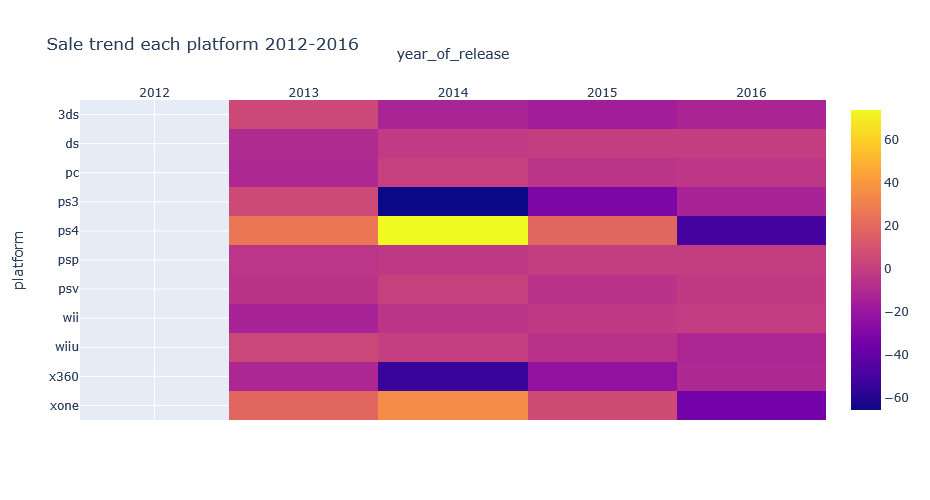

In [44]:
#plot heatmap
fig = px.imshow(trend.T,
                labels=dict(year_of_release="Year", platform="Platform"),
               title='Sale trend each platform 2012-2016',
             height=500)

fig.update_xaxes(side="top")
fig.show()

A partir de los datos presentados en el mapa de calor, se puede concluir que las ventas de consolas de juegos han sido bastante volátiles en los últimos años. La PS4 fue una consola extremadamente popular en su lanzamiento en 2014, pero su popularidad comenzó a disminuir rápidamente en los años siguientes, Al mismo tiempo, la Xbox One también ha experimentado una disminución en las ventas desde su lanzamiento en 2014. Por otro lado, la Wii ha mantenido un nivel de ventas relativamente estable, mientras que la PS3 y la Xbox360 han experimentado disminuciones significativas en las ventas en años anteriores. En general, estos datos sugieren que el mercado de consolas de juegos es altamente competitivo y puede ser difícil para las empresas mantener un nivel constante de ventas a largo plazo. pero tenemos que tener en cuenta que las fechas posteriores del 2016, puede que algunas consolas, como la PS4 Y XONE hayan tenido una baja pero en los años postriore se hayan recuperado, ademas, cabe recordar que tenemos datos incompletos. 

### ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

In [45]:
#agrupar los datos por año y plataforma y calcular la cuma total de ventas
avg_sale = filtered.groupby(['platform'])['total_sales'].sum().reset_index()
avg_sale.sort_values('total_sales',ascending=False)

platform  total_sales
4       ps4       314.14
3       ps3       288.79
9      x360       236.54
0       3ds       194.61
10     xone       159.32
8      wiiu        82.19
2        pc        62.65
6       psv        49.18
7       wii        35.37
1        ds        12.55
5       psp        11.19

Los cinvo videojuegos mas populares son los siguientes :


PS4 (314.14), PS3 (288.79) , X360 (236.54), DS (194.61) and XOne (159.323) while other are below $100M in total sales during 2012 - 2016.

In [46]:
#Agrupar por año y platform con la suma total
total_sale = filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
total_sale.sample(10)

platform  year_of_release  total_sales
17      ps4             2013        25.99
9        pc             2014        13.28
48     xone             2016        26.15
0       3ds             2012        51.36
36     wiiu             2013        21.65
31      wii             2013         8.59
13      ps3             2013       113.25
44     x360             2016         1.52
30      wii             2012        21.71
32      wii             2014         3.75

In [47]:
total_sale.describe()

year_of_release  total_sales
count        49.000000     49.00000
mean       2013.979592     29.52102
std           1.391788     33.28041
min        2012.000000      0.12000
25%        2013.000000      6.25000
50%        2014.000000     16.35000
75%        2015.000000     43.76000
max        2016.000000    118.90000

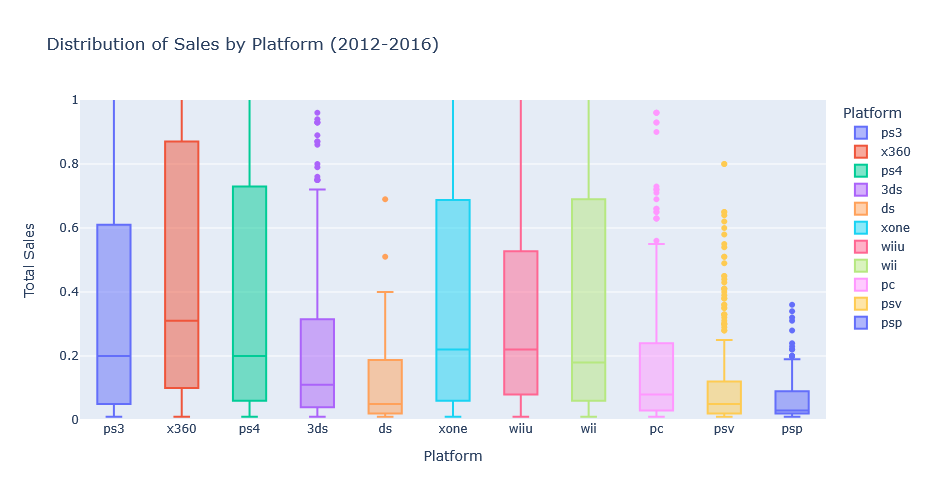

In [48]:
# Creamos un grafico para que podamos visualizar de mejor forma las variables
fig = px.box(filtered, x="platform", y="total_sales", color='platform',
            title='Distribution of Sales by Platform (2012-2016)',
            labels=dict(total_sales="Total Sales", platform="Platform"))

fig.update_layout(height=500, yaxis=dict(range=[0, 1]))
fig.show()

  Las conclusiones son las siguientes;
  
  
    El PS4 fue la plataforma con mayores ventas en promedio en 2015 y 2014.
    La Wii tuvo las ventas más bajas en promedio en 2015 y 2016.
    La Xbox360 tuvo la venta más alta en promedio en 2012.
    El PC y el PSV parecen tener un rango de ventas similares en promedio.

El diagrama de caja representa la distribución de las ventas totales por plataforma para los años 2012-2016. La línea media en cada caja representa la mediana de las ventas totales para esa plataforma. La parte inferior de la caja representa el primer cuartil de las ventas totales, y la parte superior de la caja representa el tercer cuartil de las ventas totales. Los puntos que se encuentran fuera de la caja representan valores atípicos en los datos, es decir, valores que están muy por encima o por debajo del rango normal de valores para esa plataforma en particular.

Las consolas que mas ventas tuvieron fueron las siguientes;
1. x360
2. wii
3. xone
4. PS3


### cómo las reseñas de usuarios y profesionales afectan las ventas de la PS3

`Crecion de nuevas tablas `

In [49]:
#Creacion de una tabla que no tenga (-9.9) y (-99)
df_clean= filtered.loc[(filtered['user_score'] != -9.9) & (filtered['critic_score'] != -99)]

#Creacion de una tabla que no tenga los valores negativos de user
user_clean = filtered.loc[filtered['user_score'] != -9.9]

#Creacion de una tabla que no tenga los valores negativos de Critic
critic_clean = filtered.loc[filtered['critic_score'] != -99]

`Descricpcion de las tablas creadas`

In [50]:
#Descripcion de la tabla user_clean
user_clean.describe()


year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      1531.000000  1531.000000  1531.000000  1531.000000  1531.000000   
mean       2013.894840     0.316512     0.269804     0.053318     0.083971   
std           1.397493     0.664663     0.612754     0.192082     0.200107   
min        2012.000000     0.000000     0.000000     0.000000     0.000000   
25%        2013.000000     0.020000     0.020000     0.000000     0.010000   
50%        2014.000000     0.100000     0.090000     0.000000     0.030000   
75%        2015.000000     0.340000     0.260000     0.040000     0.080000   
max        2016.000000     9.660000     9.090000     4.390000     3.960000   

       critic_score   user_score  total_sales  
count   1531.000000  1531.000000  1531.000000  
mean      46.188766     6.636120     0.723605  
std       62.778584     1.569033     1.435642  
min      -99.000000     0.200000     0.010000  
25%       57.500000     5.800000     0.090000  
50%       72.000000     7.000000     0.270000  
75%       80.000000     7.800000     0.740000  
max       97.000000     9.300000    21.050000

In [51]:
#Descripcion de la tabla critic_clean
critic_clean.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      1312.000000  1312.000000  1312.000000  1312.000000  1312.000000   
mean       2013.827744     0.333765     0.286997     0.058643     0.089268   
std           1.427386     0.700883     0.645459     0.205532     0.212671   
min        2012.000000     0.000000     0.000000     0.000000     0.000000   
25%        2013.000000     0.020000     0.030000     0.000000     0.010000   
50%        2014.000000     0.110000     0.095000     0.000000     0.030000   
75%        2015.000000     0.350000     0.280000     0.040000     0.080000   
max        2016.000000     9.660000     9.090000     4.390000     3.960000   

       critic_score   user_score  total_sales  
count   1312.000000  1312.000000  1312.000000  
mean      72.258384     6.570122     0.768674  
std       12.687087     2.295269     1.519067  
min       13.000000    -9.900000     0.010000  
25%       66.000000     5.900000     0.100000  
50%       74.000000     7.100000     0.280000  
75%       81.000000     7.900000     0.800000  
max       97.000000     9.300000    21.050000

In [52]:
#Descripcion de la tabla user_clean
user_clean.describe()

year_of_release     na_sales     eu_sales     jp_sales  other_sales  \
count      1531.000000  1531.000000  1531.000000  1531.000000  1531.000000   
mean       2013.894840     0.316512     0.269804     0.053318     0.083971   
std           1.397493     0.664663     0.612754     0.192082     0.200107   
min        2012.000000     0.000000     0.000000     0.000000     0.000000   
25%        2013.000000     0.020000     0.020000     0.000000     0.010000   
50%        2014.000000     0.100000     0.090000     0.000000     0.030000   
75%        2015.000000     0.340000     0.260000     0.040000     0.080000   
max        2016.000000     9.660000     9.090000     4.390000     3.960000   

       critic_score   user_score  total_sales  
count   1531.000000  1531.000000  1531.000000  
mean      46.188766     6.636120     0.723605  
std       62.778584     1.569033     1.435642  
min      -99.000000     0.200000     0.010000  
25%       57.500000     5.800000     0.090000  
50%       72.000000     7.000000     0.270000  
75%       80.000000     7.800000     0.740000  
max       97.000000     9.300000    21.050000

`Seleccion y filtrado de la plataforma PS3`

In [53]:
#Filtrar solo la PS3 con user_clean
df_ps3_user = user_clean.query(' platform == "ps3"')
df_ps3_user.head()

name platform  year_of_release    genre  na_sales  \
16           grand theft auto v      ps3             2013   action      7.02   
34   call of duty: black ops ii      ps3             2012  shooter      4.99   
69         call of duty: ghosts      ps3             2013  shooter      4.10   
81               fifa soccer 13      ps3             2012   action      1.06   
126                     fifa 14      ps3             2013   sports      0.78   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16       9.09      0.98         3.96          97.0         8.2      m   
34       5.73      0.65         2.42          83.0         5.3      m   
69       3.63      0.38         1.25          71.0         2.6      m   
81       5.01      0.13         1.97          88.0         6.6      e   
126      4.24      0.07         1.37          86.0         4.3      e   

     total_sales  
16         21.05  
34         13.79  
69          9.36  
81          8.17  
126         6.46

In [54]:
#Filtrar solo la PS3 con critic_clean
df_ps3_critic = critic_clean.query(' platform == "ps3"')
df_ps3_critic.head()

name platform  year_of_release    genre  na_sales  \
16           grand theft auto v      ps3             2013   action      7.02   
34   call of duty: black ops ii      ps3             2012  shooter      4.99   
69         call of duty: ghosts      ps3             2013  shooter      4.10   
81               fifa soccer 13      ps3             2012   action      1.06   
126                     fifa 14      ps3             2013   sports      0.78   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16       9.09      0.98         3.96          97.0         8.2      m   
34       5.73      0.65         2.42          83.0         5.3      m   
69       3.63      0.38         1.25          71.0         2.6      m   
81       5.01      0.13         1.97          88.0         6.6      e   
126      4.24      0.07         1.37          86.0         4.3      e   

     total_sales  
16         21.05  
34         13.79  
69          9.36  
81          8.17  
126         6.46

`Grafico de las variables`

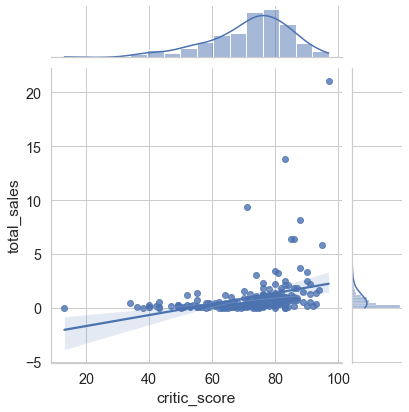

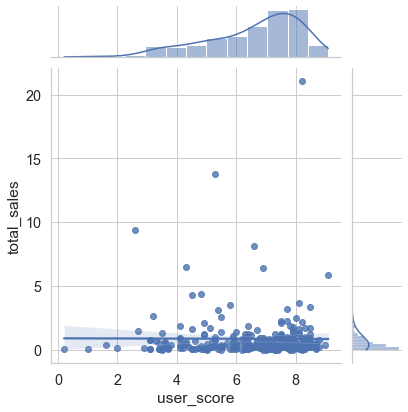

In [55]:
#Mostrar graficamente 

sns.jointplot(data=df_ps3_critic, x='critic_score', y='total_sales', kind='reg')
plt.show()

sns.jointplot(data=df_ps3_user, x='user_score', y='total_sales', kind='reg')
plt.show()

In [56]:

print(df_ps3_user[['critic_score', 'user_score', 'total_sales']].corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.256754     0.145291
user_score        0.256754    1.000000    -0.005144
total_sales       0.145291   -0.005144     1.000000


   En este coeficiciente de correlacion no tendremos en cuenta a **Critic_score** debido a que se ecnuentran incorporados los numero negativos incorporados, por lo que solo veremos como actua user_Score:


    El coeficiente de correlación entre user_score y total_sales es -0.005144. Este valor indica que no hay correlación significativa entre estas dos variables. En otras palabras, la puntuación de los usuarios no parece tener una influencia significativa en las ventas totales.

In [57]:
print(df_ps3_critic[['critic_score', 'user_score', 'total_sales']].corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.528011     0.331497
user_score        0.528011    1.000000     0.022067
total_sales       0.331497    0.022067     1.000000


 En este coeficiciente de correlacion no tendremos en cuenta a **user_score** debido a que se encuentran incorporados los numero negativos incorporados, por lo que solo veremos como actua critic_score:


    El coeficiente de correlación entre critic_score y total_sales es 0.331497. Este valor indica que hay una correlación positiva moderada entre estas dos variables. Es decir, si la puntuación de un crítico es alta, es probable que las ventas totales también sean altas, y viceversa. Además, la fuerza de esta relación es moderada, lo que sugiere que la opinión de los críticos influye moderadamente en las ventas totales.

***Conclusion General***

El coeficiente de correlación entre critic_score y total_sales es de  0.331497, lo que indica una correlación positiva moderada. Es decir, hay una relación positiva entre las calificaciones de los críticos y las ventas totales de la plataforma PS3.

Sin embargo, el coeficiente de correlación entre user_score y total_sales es de -0.005144, lo que indica que no hay una correlación significativa entre las calificaciones de los usuarios y las ventas totales de la plataforma PS3.

Por lo tanto, se puede concluir que las calificaciones de los críticos parecen ser un factor importante para determinar las ventas totales de la plataforma PS3, mientras que las calificaciones de los usuarios no tienen un impacto significativo. Es importante tener en cuenta que la correlación no implica causalidad, y hay otros factores que podrían influir en las ventas totales de la plataforma PS3.

### 3.3 Compara las ventas de los mismos juegos en otras plataformas.

In [58]:
#Vamos a buscar los juegos que tienen multiplataforma 

# Selecciona los juegos que aparecen en más de una plataforma
multi_platform = filtered[filtered["name"].duplicated(keep=False)]

# Agrupa los datos por nombre del juego y suma las ventas totales
multi_platform_sales = multi_platform.groupby("name")["total_sales"].sum()

# Crea una tabla dinámica 
pivot_table = pd.pivot_table(multi_platform, index="name", columns="platform", values="total_sales", aggfunc="sum")

# Agrega una columna adicional con las ventas totales por juego
pivot_table["Total"] = multi_platform_sales

# Ordena la tabla por ventas totales en orden descendente
pivot_table.sort_values("Total", ascending=False, inplace=True)


In [59]:
pivot_table.head(5)

platform                    3ds  ds    pc    ps3    ps4  psp   psv  wii  wiiu  \
name                                                                            
grand theft auto v          NaN NaN  1.17  21.05  12.62  NaN   NaN  NaN   NaN   
call of duty: black ops ii  NaN NaN  1.52  13.79    NaN  NaN   NaN  NaN  0.41   
call of duty: ghosts        NaN NaN  0.69   9.36   3.83  NaN   NaN  NaN  0.35   
call of duty: black ops 3   NaN NaN  0.26   1.69  14.63  NaN   NaN  NaN   NaN   
minecraft                   NaN NaN   NaN   5.27   4.32  NaN  1.96  NaN  0.67   

platform                     x360  xone  Total  
name                                            
grand theft auto v          16.27  5.47  56.58  
call of duty: black ops ii  13.68   NaN  29.40  
call of duty: ghosts        10.24  2.92  27.39  
call of duty: black ops 3    1.70  7.39  25.67  
minecraft                    9.18  2.76  24.16

Nuestro analisis se basara en los primeros 5 juegos mas vedidos y que son multiplataforma

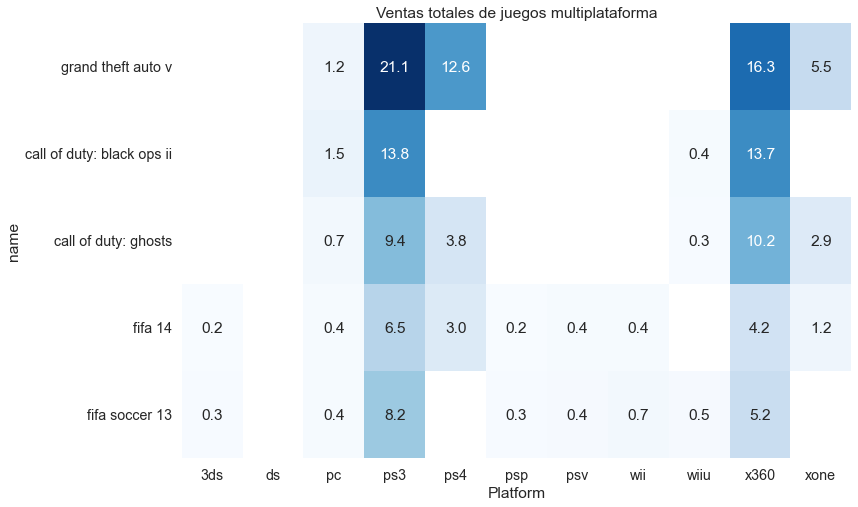

In [60]:

#Creamos un grafico de colores para detectas a simple vista las plataformas mas usadas en cada plataaforma
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table.loc[['grand theft auto v', 'call of duty: black ops ii', 'call of duty: ghosts', 'fifa 14', 'fifa soccer 13'], '3ds':'xone'], cmap="Blues", annot=True, fmt=".1f", cbar=False)
plt.title('Ventas totales de juegos multiplataforma')
plt.xlabel('Platform')
plt.ylabel('name')
plt.show()

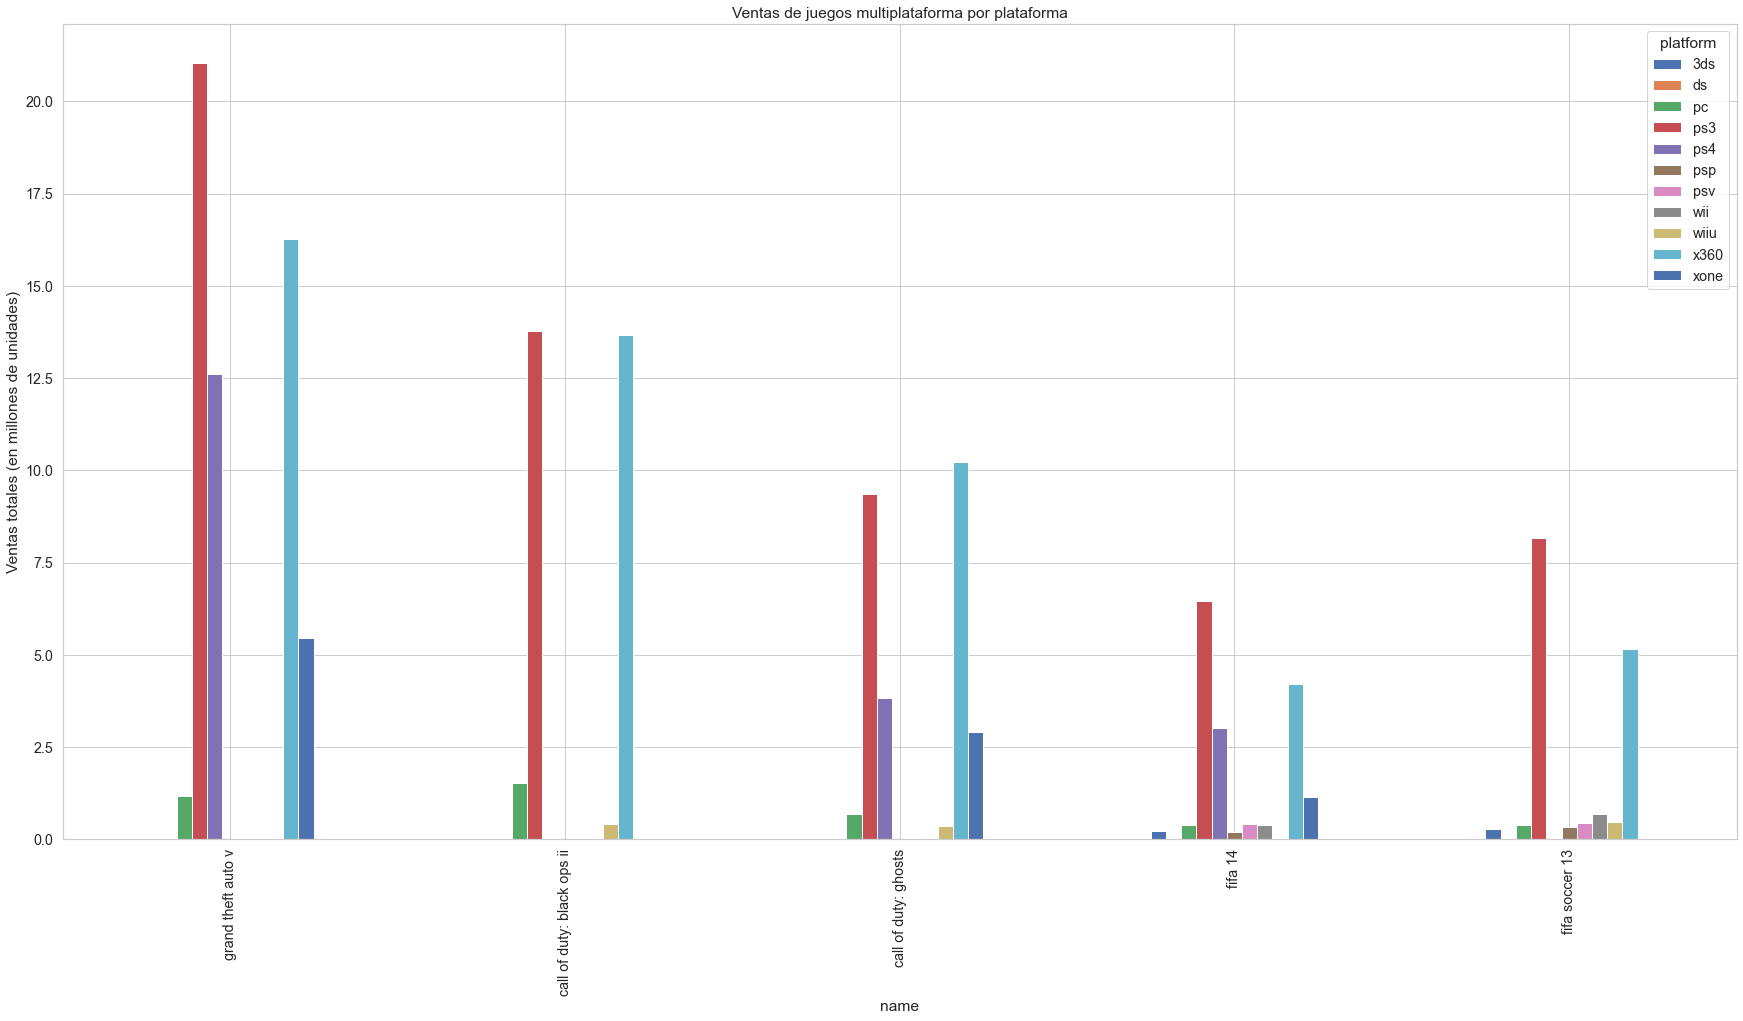

In [61]:
#Creamos una grafico de barras para detectar las plataformas mas usadads, filtrando primero los primeros cinco juegos


games = ['grand theft auto v', 'call of duty: black ops ii', 'call of duty: ghosts', 'fifa 14', 'fifa soccer 13']
filtered_pivot = pivot_table.loc[games]

# Seleccionar todas las columnas excepto la última
filtered_pivot = filtered_pivot.iloc[:, :-1]

# Crear el gráfico de barras
filtered_pivot.plot(kind='bar', figsize=(30, 15))

# Establecer los títulos de los ejes y el título del gráfico
plt.xlabel('name')
plt.ylabel('Ventas totales (en millones de unidades)')
plt.title('Ventas de juegos multiplataforma por plataforma')

# Mostrar el gráfico
plt.show()

***Conclusion general***

Los cinco juegos que tienen mas ventas y que se han lanzado en diferentes consolas, son las siguientes;
- grand theft auto v'
- 'call of duty: black ops ii
- call of duty: ghosts'
- 'fifa 14'
- 'fifa soccer 13'

Con respecto a esos juegos, las consolas más usadas y que generaron más ventas son el PS3 y X360 y por ultimo se encuenta la 6s4


### ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [62]:
#Filtramos las plataformas mas populares 

pop_plat = filtered.query(' platform in ("ps4","ps3", "x360", "3ds", "xone")')
pop_plat

name platform  \
16                                grand theft auto v      ps3   
23                                grand theft auto v     x360   
31                         call of duty: black ops 3      ps4   
33                               pokemon x/pokemon y      3ds   
34                        call of duty: black ops ii      ps3   
...                                              ...      ...   
16672  metal gear solid v: the definitive experience     xone   
16674                  tsukigime ranko's longest day      ps3   
16677               aikatsu stars! my special appeal      3ds   
16691                   dynasty warriors: eiketsuden      ps3   
16710                  samurai warriors: sanada maru      ps3   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
16                2013        action      7.02      9.09      0.98   
23                2013        action      9.66      5.14      0.06   
31                2015       shooter      6.03      5.86      0.36   
33                2013  role-playing      5.28      4.19      4.35   
34                2012       shooter      4.99      5.73      0.65   
...                ...           ...       ...       ...       ...   
16672             2016        action      0.01      0.00      0.00   
16674             2014        action      0.00      0.01      0.00   
16677             2016        action      0.00      0.00      0.01   
16691             2016        action      0.00      0.00      0.01   
16710             2016        action      0.00      0.00      0.01   

       other_sales  critic_score  user_score rating  total_sales  
16            3.96          97.0         8.2      m        21.05  
23            1.41          97.0         8.1      m        16.27  
31            2.38         -99.0        -9.9    NaN        14.63  
33            0.78         -99.0        -9.9    NaN        14.60  
34            2.42          83.0         5.3      m        13.79  
...            ...           ...         ...    ...          ...  
16672         0.00         -99.0        -9.9      m         0.01  
16674         0.00         -99.0        -9.9    NaN         0.01  
16677         0.00         -99.0        -9.9    NaN         0.01  
16691         0.00         -99.0        -9.9    NaN         0.01  
16710         0.00         -99.0        -9.9    NaN         0.01  

[1820 rows x 12 columns]

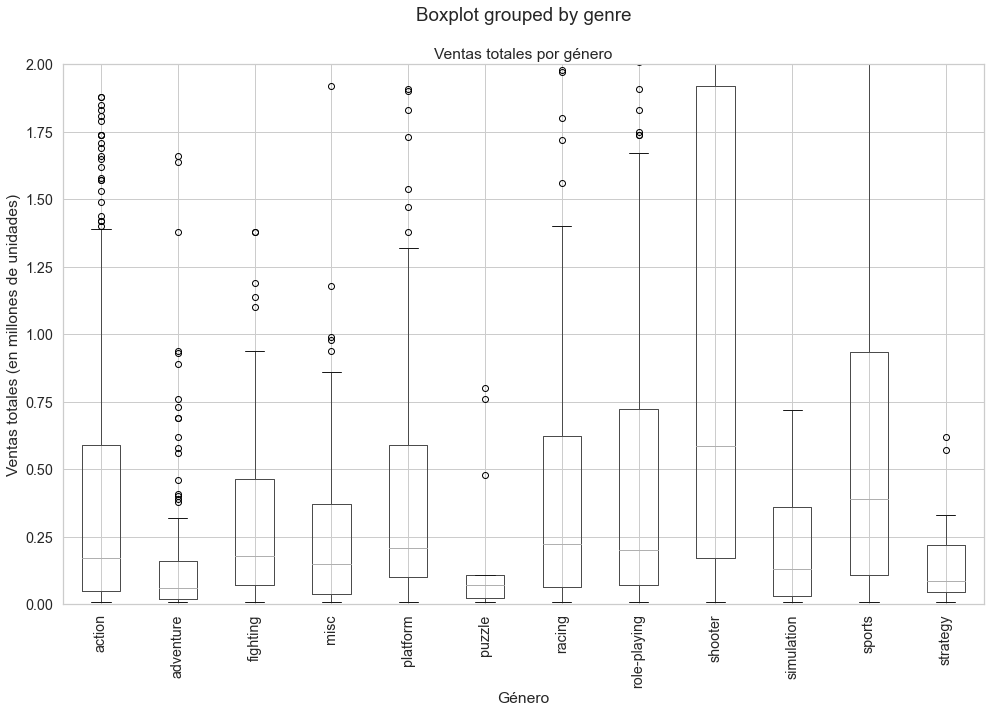

In [63]:
# Obtener una lista de todos los géneros únicos
genres = pop_plat['genre'].unique()

# Crear un diagrama de caja para cada género
pop_plat.boxplot(column='total_sales', by='genre', figsize=(16,10))
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones de unidades)')
plt.title('Ventas totales por género')
plt.ylim(0, 2)
plt.show()

***Conclusion general***


    -Los cinco géneros más populares son acción, shooter y simulation 
   .

En resumen, los géneros de aacción, shooter y simulation  son los más populares en general, mientras que la popularidad de otros géneros puede variar según la plataforma. Además, PS4, Xbox360 y PS3 parecen ser las plataformas más populares para la mayoría de los géneros de juegos.

In [64]:
genre_comp = filtered.pivot_table(index=['genre'],
                                       values=['na_sales','eu_sales','jp_sales' ,'total_sales','other_sales' ],
                                       aggfunc=sum)\
.reset_index()\
.sort_values(by='total_sales', ascending=False)

genre_comp.sample(5)

genre  eu_sales  jp_sales  na_sales  other_sales  total_sales
8    shooter    113.47      9.23    144.77        37.26       304.73
11  strategy      5.17      2.88      4.23         1.06        13.34
2   fighting     10.79      9.44     19.79         4.47        44.49
4   platform     21.41      8.63     25.38         5.58        61.00
10    sports     69.09      8.01     81.53        22.44       181.07

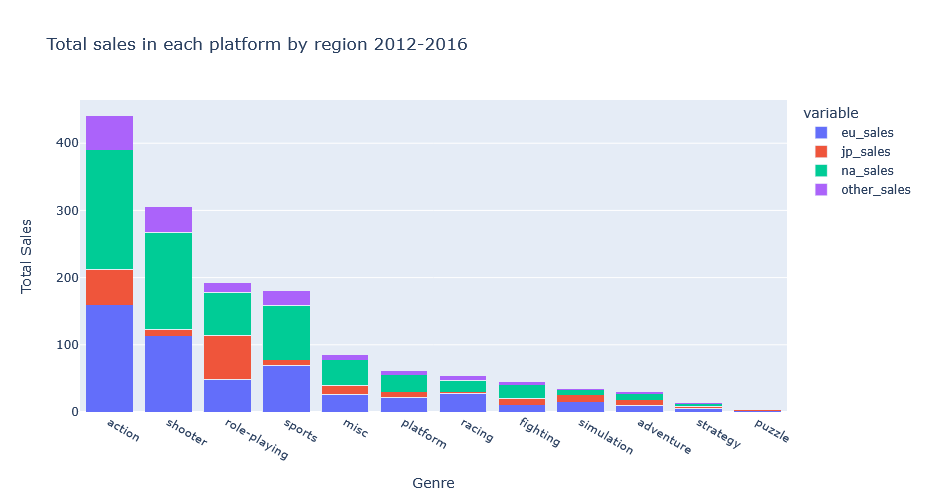

In [65]:
fig = px.bar(genre_comp, x="genre", y=['eu_sales','jp_sales', 'na_sales','other_sales'], barmode='group',
             title='Total sales in each platform by region 2012-2016',
            labels=dict(value='Total Sales', genre='Genre'),
             height=500)

fig.update_layout(barmode='stack')
fig.show()

Norteamérica y Europa tienen una alta participación en la mayoría de los géneros.
Los géneros más populares son Acción, Disparos, Rol, Deportes y Varios

## Etapa 4 Crea un perfil de usuario para cada región

determina Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

`Top 5 por plataforma`

In [66]:
#total de  ventas en cada plataforma 
region = filtered.pivot_table(index=['platform'],
                                      values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                                      aggfunc=sum)\
.reset_index().sort_values(by='total_sales', ascending=False)

#Seleccionar solo las cinco plataformas principales
top_plat_region = region.head(5)
top_plat_region

platform  eu_sales  jp_sales  na_sales  other_sales  total_sales
4       ps4    141.09     15.96    108.74        48.35       314.14
3       ps3    106.86     35.29    103.38        43.26       288.79
9      x360     74.52      1.57    140.05        20.40       236.54
0       3ds     42.64     87.79     55.31         8.87       194.61
10     xone     51.59      0.34     93.12        14.27       159.32

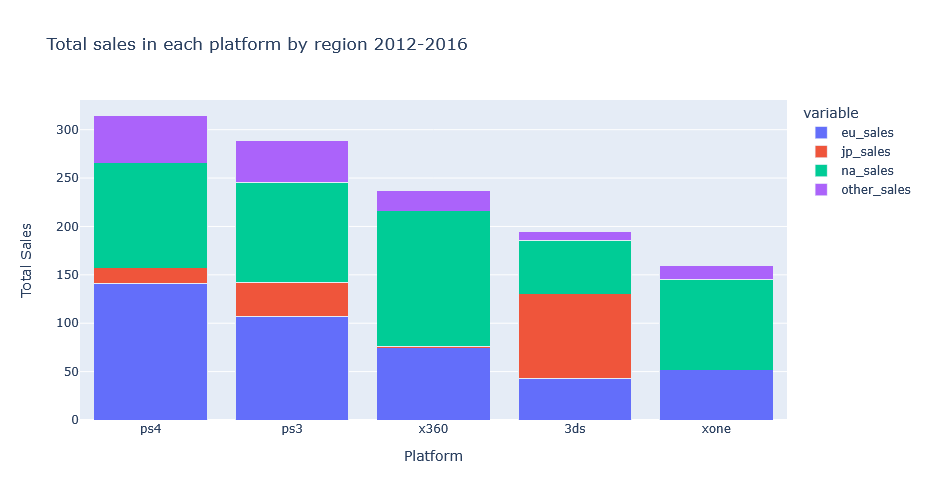

In [67]:
#Greafico de barras de ventas de plataformas en cada region
fig = px.bar(top_plat_region, x="platform", y=['eu_sales','jp_sales', 'na_sales','other_sales'], barmode='group',
             title='Total sales in each platform by region 2012-2016',
            labels=dict(value='Total Sales', platform='Platform'),
             height=500)

fig.update_layout(barmode='stack')
fig.show()

***Concluson general***

el gráfico de barras apiladas muestra que la plataforma más popular en términos de ventas totales es la PS4, seguida de la PS3 y la Xbox 360. La región de Norteamérica es la que más contribuye a las ventas totales de todas las plataformas, seguida de Europa y Japón. Esto indica que las preferencias de los jugadores varían de una región a otra, lo que puede estar relacionado con las preferencias culturales y las estrategias de marketing y distribución de las empresas de videojuegos.

Además, el gráfico también muestra que la 3DS tiene una gran participación en el mercado japonés, lo que indica que esta plataforma es muy popular en esa región en particular. Por otro lado, la Xbox One tiene una participación muy pequeña en el mercado japonés, lo que sugiere que esta plataforma no es muy popular en esa región.

<function matplotlib.pyplot.show(close=None, block=None)>

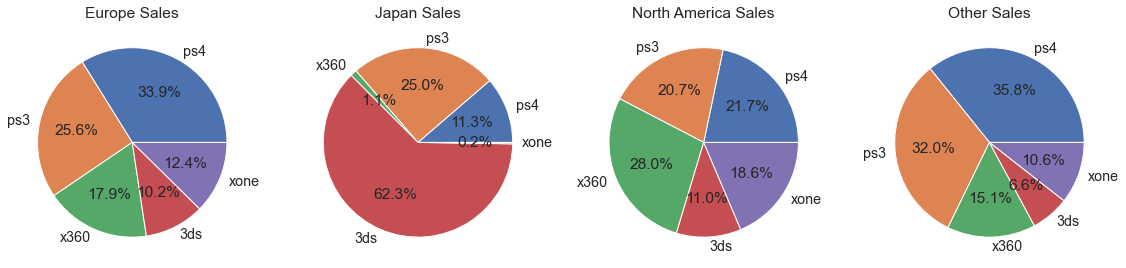

In [68]:
# Extraer los datos para cada región
eu_sales = top_plat_region['eu_sales']
jp_sales = top_plat_region['jp_sales']
na_sales = top_plat_region['na_sales']
other_sales = top_plat_region['other_sales']

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Crear un gráfico de pastel para cada región y asignarlo a un subplot
axs[0].pie(eu_sales, labels=top_plat_region['platform'], autopct='%1.1f%%')
axs[1].pie(jp_sales, labels=top_plat_region['platform'], autopct='%1.1f%%')
axs[2].pie(na_sales, labels=top_plat_region['platform'], autopct='%1.1f%%')
axs[3].pie(other_sales, labels=top_plat_region['platform'], autopct='%1.1f%%')

# Añadir títulos a cada subplot
axs[0].set_title('Europe Sales')
axs[1].set_title('Japan Sales')
axs[2].set_title('North America Sales')
axs[3].set_title('Other Sales')

# Ajustar el layout de los subplots para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show

 ***Conclusion general***
 
 la plataforma PS4 es la que tiene la mayor cuota de mercado en Europa, Norteamérica y en "Other" regiones, mientras que en Japón, la plataforma 3DS tiene la mayor cuota de mercado.

También podemos observar que Xbox 360 tiene una cuota de mercado significativamente mayor en Norteamérica en comparación con las otras regiones, mientras que la plataforma Xbox One tiene una cuota de mercado relativamente baja en todas las regiones en comparación con las otras plataformas.

En general, la plataforma PS4 parece tener la mayor cuota de mercado a nivel mundial, seguida de la plataforma 3DS y Xbox 360. El gráfico de pastel con porcentajes aplicados proporciona una buena visualización de la distribución de las ventas de videojuegos entre las diferentes plataformas en cada región y puede ayudar a identificar tendencias y patrones en el mercado de videojuegos.

`top 5 por region`

In [69]:
genre = filtered.pivot_table(index=['genre'],
                                      values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                                      aggfunc=sum)\
.reset_index().sort_values(by='total_sales', ascending=False)

top_plat_genre = genre.head(5)
top_plat_genre

genre  eu_sales  jp_sales  na_sales  other_sales  total_sales
0         action    159.34     52.80    177.84        51.14       441.12
8        shooter    113.47      9.23    144.77        37.26       304.73
7   role-playing     48.53     65.44     64.00        14.83       192.80
10        sports     69.09      8.01     81.53        22.44       181.07
3           misc     26.32     12.86     38.19         7.67        85.04

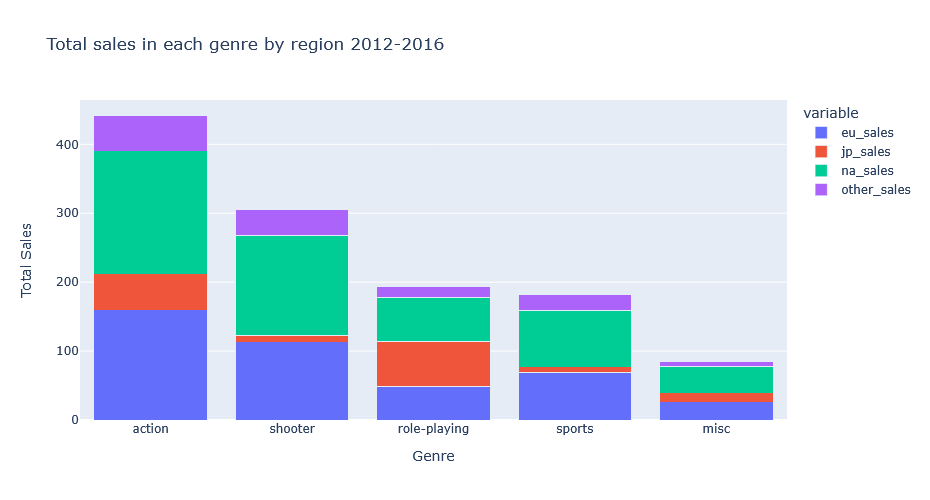

In [70]:
#Greafico de barras de ventas de genero en cada region
fig = px.bar(top_plat_genre, x="genre", y=['eu_sales','jp_sales', 'na_sales','other_sales'], barmode='group',
             title='Total sales in each genre by region 2012-2016',
            labels=dict(value='Total Sales', genre='Genre'),
             height=500)

fig.update_layout(barmode='stack')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

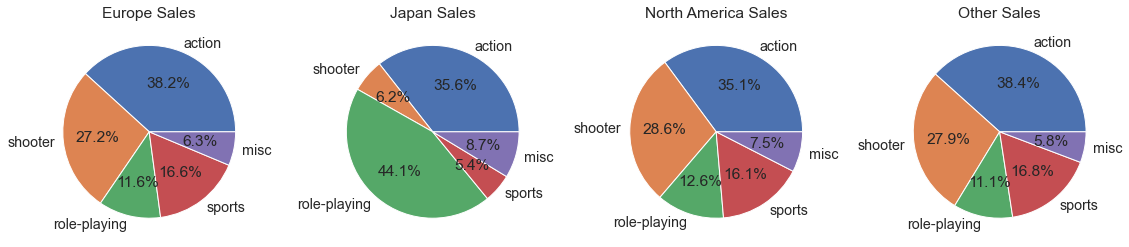

In [71]:
# Extraer los datos para cada región
eu_sales = top_plat_genre['eu_sales']
jp_sales = top_plat_genre['jp_sales']
na_sales = top_plat_genre['na_sales']
other_sales = top_plat_genre['other_sales']

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Crear un gráfico de pastel para cada región y asignarlo a un subplot
axs[0].pie(eu_sales, labels=top_plat_genre['genre'], autopct='%1.1f%%')
axs[1].pie(jp_sales, labels=top_plat_genre['genre'], autopct='%1.1f%%')
axs[2].pie(na_sales, labels=top_plat_genre['genre'], autopct='%1.1f%%')
axs[3].pie(other_sales, labels=top_plat_genre['genre'], autopct='%1.1f%%')

# Añadir títulos a cada subplot
axs[0].set_title('Europe Sales')
axs[1].set_title('Japan Sales')
axs[2].set_title('North America Sales')
axs[3].set_title('Other Sales')

# Ajustar el layout de los subplots para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show

***Conclusion general***

El gráfico muestra la cuota de mercado de cada género de videojuegos en cada región. Podemos observar que el género "Acción" es el más vendido en Europa y Norteamérica, mientras que el género "Rol-Playing" es el más vendido en Japón. El género "shooter" también tiene una cuota de mercado significativa en Norteamérica y Europa.

 #### Explica la diferencia.
 
el mercado japonés es diferente a otras regiones, con la mayor venta en la plataforma 3DS y los juegos de role . Aunque los deportes no son la principal venta en Japón, aún tienen la mayor participación de mercado en comparación con otras regiones. Fuera de Japón, Xbox360, PS4 y PS3 se encuentran en la mayoría de las listas principales. PS4 es el líder en Europa y otras regiones, mientras que Xbox está en América del Norte.

### las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [72]:
#agrupar  la venta por región en cada clasificación ESRB
grouped_rating = filtered.pivot_table(index=['rating'],
                                      values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                                      aggfunc=sum)\
.reset_index()\
.sort_values(by='total_sales', ascending=False)

grouped_rating

rating  eu_sales  jp_sales  na_sales  other_sales  total_sales
2      m    193.96     21.20    231.57        63.38       510.11
0      e    113.03     28.33    114.37        31.44       287.17
3      t     52.96     26.02     66.02        17.94       162.94
1   e10+     55.37      8.19     75.70        16.23       155.49

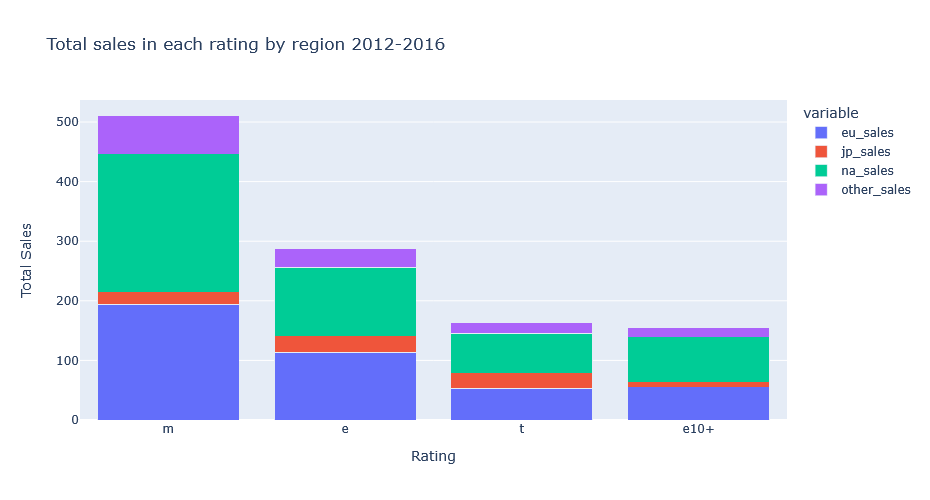

In [73]:
#Frafico de barra de los top erp 
fig = px.bar(grouped_rating, x="rating", y=['eu_sales','jp_sales', 'na_sales','other_sales'], barmode='group',
             title='Total sales in each rating by region 2012-2016',
            labels=dict(value='Total Sales', rating='Rating'),
             height=500)

fig.update_layout(barmode='stack')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

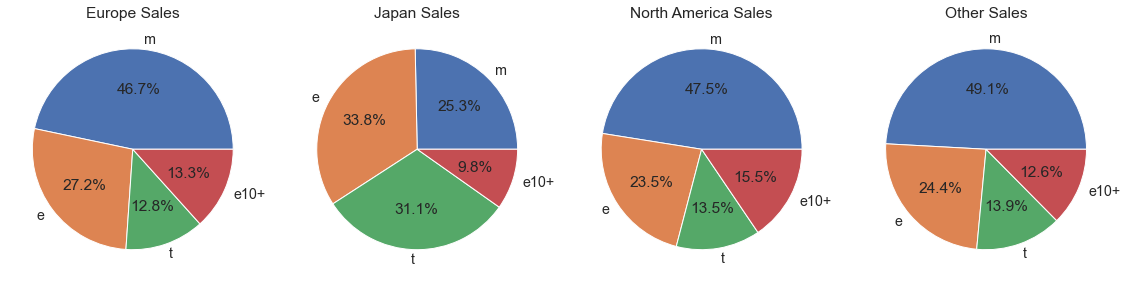

In [74]:
# Extraer los datos para cada región
eu_sales = grouped_rating['eu_sales']
jp_sales = grouped_rating['jp_sales']
na_sales = grouped_rating['na_sales']
other_sales = grouped_rating['other_sales']

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

# Crear un gráfico de pastel para cada región y asignarlo a un subplot
axs[0].pie(eu_sales, labels=grouped_rating['rating'], autopct='%1.1f%%')
axs[1].pie(jp_sales, labels=grouped_rating['rating'], autopct='%1.1f%%')
axs[2].pie(na_sales, labels=grouped_rating['rating'], autopct='%1.1f%%')
axs[3].pie(other_sales, labels=grouped_rating['rating'], autopct='%1.1f%%')

# Añadir títulos a cada subplot
axs[0].set_title('Europe Sales')
axs[1].set_title('Japan Sales')
axs[2].set_title('North America Sales')
axs[3].set_title('Other Sales')

# Ajustar el layout de los subplots para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show

***Conclusion general***

según la información proporcionada, la calificación M es la que tiene la mayor participación en el mercado de los videojuegos. Esta calificación indica que el contenido es apropiado para mayores de 17 años, lo que sugiere que los juegos con temáticas más maduras y violentas son los que tienen mayor aceptación por parte del público.

Por otro lado, se puede observar que Japón no es un gran fan de los juegos con clasificación E10+. Esta clasificación indica que el contenido es apropiado para personas mayores de 10 años y puede contener un poco de violencia y lenguaje moderado. Parece que el público japonés prefiere juegos con clasificaciones más altas que tengan temáticas más maduras y complejas.

También se puede concluir que las clasificaciones AO, EC y RP no son populares en el mercado de los videojuegos, ya que ni siquiera aparecen en el gráfico. La clasificación AO indica que el contenido es solo para adultos, mientras que EC significa que el contenido es apropiado para todos los públicos y RP significa que el juego aún no ha sido clasificado. Es posible que estos tipos de clasificaciones no sean comunes en el mercado de los videojuegos debido a su naturaleza restrictiva o ambigua.

En general, estas conclusiones sugieren que el público de los videojuegos prefiere contenido maduro y violento en lugar de contenido más infantil o familiar. Sin embargo, es importante tener en cuenta que estas conclusiones se basan en un conjunto limitado de datos y pueden no ser representativas de todo el mercado de los videojuegos.

## Etapa 5 test de hipotesis

Analizaremos dos teorias, y para eso, aplicaremos el test de hipotesis para refutar o aprobar 

### HIPOTESIS 1  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

- La hipótesis nula (H0) = las calificaciones promedio de los usuarios de las plataformas Xbox One y PC pertenecen a la misma población estadística.

- La hipótesis alternativa (H1) = Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC no pertenecen a la misma población 
estadística.

- El nivel de significancia es de 0.05.

In [75]:
# creamos dos tablas con los datos necesarios
xbox_one = user_clean[user_clean['platform'] == 'xone']['user_score']
pc_scores = user_clean[user_clean['platform'] == 'pc']['user_score']
alpha = 0.05

#Calculamos el promedio

xbox_one_mean = xbox_one.mean()
pc_mean = pc_scores.mean()

#Calculamos el test de hipotesis

t_stat, p_val = ttest_ind(xbox_one, pc_scores, equal_var=True)
print("Xbox One promedio : {:.2f}".format(xbox_one_mean))
print("PC promedio: {:.2f}".format(pc_mean))
print("t-statistic: {:.2f}, p-value: {:.5f}".format(t_stat, p_val))

if p_val < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC no pertenecen a la misma población estadística.")
else:
    print("No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios de las plataformas Xbox One y PC pertenecen a la misma población estadística.")

Xbox One promedio : 6.52
PC promedio: 6.43
t-statistic: 0.59, p-value: 0.55351
No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios de las plataformas Xbox One y PC pertenecen a la misma población estadística.


***Conclusion general***

No podemos rechazar la hipótesis nula (H0), por lo que se  no hay suficiente evidencia estadística para demostrar que las calificaciones promedio de los usuarios de ambas plataformas son diferentes. son iguales. 

### HIPOTESIS 2  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- La hipótesis nula (H0) = no hay diferencia significativa entre las calificaciones promedio de los usuarios para los dos géneros

- La hipótesis alternativa (H1) = hay diferencia significativa entre las calificaciones promedio de los usuarios para los dos géneros

- El nivel de significancia es de 0.05.

In [76]:
# seleccionar los datos de Acción y Deportes
action = user_clean[user_clean['genre'] == 'action']['user_score']
sport = user_clean[user_clean['genre'] == 'sports']['user_score']
alpha = 0.05

#calculamos el promedio

action_mean = action.mean()
sport_mean = sport.mean()

# realizar el test de hipótesis
t_stat, p_val = ttest_ind(action, sport, equal_var=True)
print("Xbox One promedio : {:.2f}".format(action_mean))
print("PC promedio: {:.2f}".format(sport_mean))
print("t-statistic: {:.2f}, p-value: {:.5f}".format(t_stat, p_val))

# imprimo el resultado

if p_val < alpha:
    print("Podemos rechazar la hipótesis nula: por lo que hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")

Xbox One promedio : 6.83
PC promedio: 5.46
t-statistic: 11.01, p-value: 0.00000
Podemos rechazar la hipótesis nula: por lo que hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


***Conclusion general***

hay suficiente evidencia estadística para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Es decir, las calificaciones de los usuarios para los juegos de Acción y Deportes no provienen de la misma población, lo que sugiere que estos géneros de juegos tienen una recepción diferente entre los usuario

# Conslusion final


El proyecto analizó datos de una tienda de videojuegos en línea llamada Ice con el objetivo de identificar patrones que determinan si un juego tiene éxito o no. Los datos incluyeron calificaciones de usuarios y expertos, géneros, plataformas, y datos históricos de ventas. Se buscó identificar los patrones que determinan si un juego tiene éxito o no para identificar posibles ganadores y planificar campañas publicitarias.

En la exploración inicial de los datos se encontró que 6 columnas tenían valores nulos y algunas columnas tenían tipos de datos incorrectos. Por lo tanto, se procedió a convertir los datos al tipo de dato adecuado. Se convirtió la columna de Year_of_Release de float a int y la columna de User_Score de string a int. Se identificó que los valores faltantes en los datos eran tanto errores visibles como valores faltantes no aleatorios (MNAR). Para preprocesar los datos, se eliminaron las filas con valores faltantes en las columnas de nombre y género, ya que los valores faltantes eran menos del 1%. En las columnas de Year_of_Release, User_Score, Rating, y Critic_Score, se aplicó una función especial para llenar los valores faltantes con un valor aleatorio de los valores únicos de la columna. En el caso de que el valor único esté vacío, se llenaron los valores faltantes con la mediana o la moda de la columna. La abreviatura TBD se manejó como un 'NaN' en el conjunto de datos.

Al analizar los datos, se investigó cuántos juegos se lanzaron en diferentes años y se observó que se lanzaron más juegos en los años 2001 a 2016. La mayoría de los juegos se lanzaron entre los años 2005 y 2011. El año con el mayor número de juegos lanzados fue 2008. Se determinó que el período 2000 a 2016 fue significativo, y los años entre 2007 y 2010 tuvieron la mayor significancia en los datos. Al analizar la variación de ventas en las plataformas, se observó que PS2, DS, PS3, Wii y X360 fueron las cinco plataformas principales en términos de ventas totales. La plataforma con las ventas más bajas fueron SCD, WS, 3DO, TG16, PCFX y GG. También se determinó que la PC tuvo la mayor venta en 2011. La PC es la plataforma con la vida útil más larga entre las demás plataformas y se vende durante aproximadamente 30 años. Por lo general, se tarda alrededor de 6 años en que aparezcan nuevas plataformas y que las antiguas desaparezcan.

Se determinó que las plataformas más rentables son PS4, PS3, XOne, 3DS y X360 en función de las ventas totales. Las plataformas TG16, 3DO, GG y PCFX son las peores en términos de ventas totales, con valores muy por debajo de la media de los datos. Se analizó cómo las calificaciones de usuarios y profesionales afectan las ventas para una plataforma popular en el período posterior al año 2014. Se concluyó después de calcular el valor p y analizar las estadísticas que existe una relación lineal significativa entre las calificaciones de los usuarios y los profesionales